### First analysis

Import useful packages

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC


Import data from Excel file CTG.xls

In [53]:
path = "../data/"
filename = "CTG.xls"

fetus = pd.read_excel(path+filename, sheet_name = "Data",header=1)
fetus.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
1,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
2,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,533,1147,4,0,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1


In [54]:
# Columns to be considered in the dataset
columns = ["LB", "AC", "FM", "UC", "DL", "DS", "DP", 
           "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Min", 
           "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency"]

In [55]:
X = fetus[columns]
y = fetus["NSP"]
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120,0,0,0,0,0,0,73,0.5,43,...,64,62,126,2,0,120,137,121,73,1
1,132,4,0,4,2,0,0,17,2.1,0,...,130,68,198,6,1,141,136,140,12,0
2,133,2,0,5,2,0,0,16,2.1,0,...,130,68,198,5,1,141,135,138,13,0
3,134,2,0,6,2,0,0,16,2.4,0,...,117,53,170,11,0,137,134,137,13,1
4,132,4,0,5,0,0,0,16,2.4,0,...,117,53,170,9,0,137,136,138,11,1


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   DL        2126 non-null   int64  
 5   DS        2126 non-null   int64  
 6   DP        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [51]:
# Apply the standar scaler to features
sc = StandardScaler()

sc.fit(X)
X_st = pd.DataFrame(sc.transform(X),columns=columns)
X_st.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,-1.352220,-0.764740,-0.195096,-1.285798,-0.628375,-0.057476,-0.27153,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.358852,-0.195096,0.119475,0.172060,-0.057476,-0.27153,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.202944,-0.195096,0.470793,0.172060,-0.057476,-0.27153,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.202944,-0.195096,0.822111,0.172060,-0.057476,-0.27153,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.358852,-0.195096,0.470793,-0.628375,-0.057476,-0.27153,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [65]:
# Split in train and test dataset (with and without Standard Scaler application)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=35)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X,y,train_size=0.8,random_state=35)

## Baseline model: Decision Tree Classifier

In [66]:
dt = DecisionTreeClassifier(random_state=35)

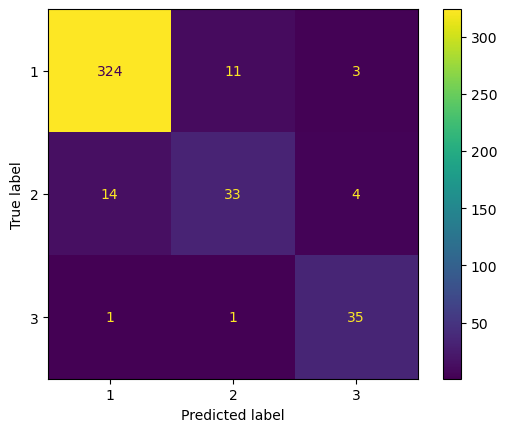

In [67]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_pred,y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

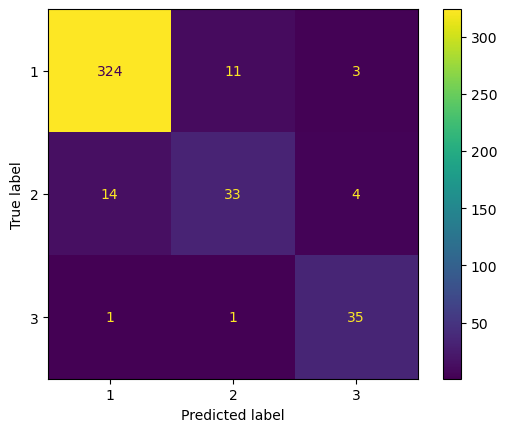

In [69]:
dt.fit(X_train_st,y_train_st)
y_pred_st = dt.predict(X_test_st)

cm = confusion_matrix(y_pred_st,y_test_st)

disp_st = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp_st.plot()

In [70]:
print("Decision Tree accuracy: %.2f" % accuracy_score(y_pred,y_test) )
print("Decision Tree accuracy with Standard Scalar: %.2f" % accuracy_score(y_pred_st,y_test_st) )

Decision Tree accuracy: 0.92
Decision Tree accuracy with Standard Scalar: 0.92


### PCA analysis

In [27]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA()
pca.fit(X_StdSca)

PCA()

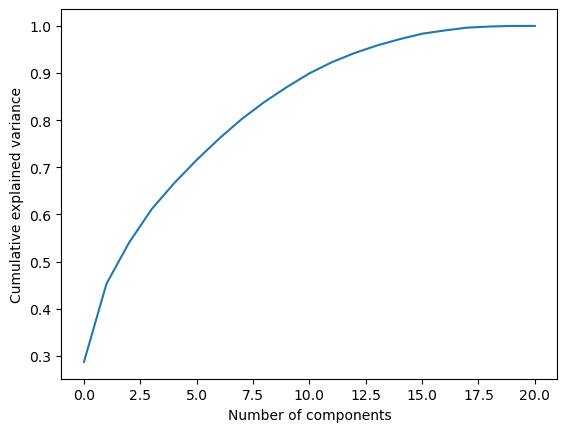

In [75]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [48]:
pca5 = PCA(n_components=15)
pca5.fit(X_StdSca)

X_pca = pca5.transform(X_StdSca)

Decision Tree accuracy with 15 components: 0.89


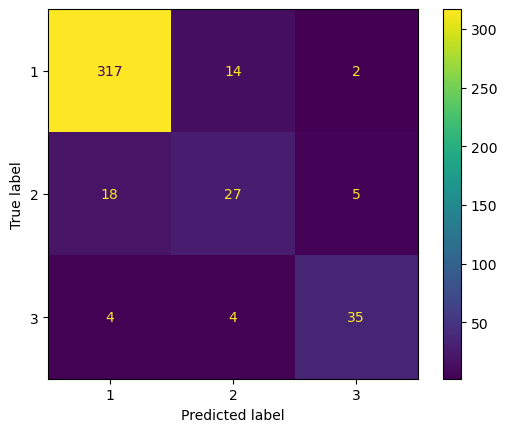

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,train_size=0.8,random_state=35)

dt = DecisionTreeClassifier(random_state=35)

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_pred,y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

print("Decision Tree accuracy with 15 components: %.2f" % accuracy_score(y_pred,y_test) )

## Support Vector Classifier

In [ ]:
svc = SVC()

model = SVC(kernel='linear', C=1E10)
model.fit(X_train, y_train)


## K-means clustering

In [77]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [81]:
error = accuracy_score(y_kmeans, y)

In [82]:
print(error)

0.3852304797742239
